<a href="https://colab.research.google.com/github/pekerow/presidential-election-simulation/blob/main/election_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Define electoral votes per state based on the 2020 census
electoral_votes = {
    'Alabama': 9, 'Alaska': 3, 'Arizona': 11, 'Arkansas': 6, 'California': 54, 'Colorado': 10, 'Connecticut': 7,
    'Delaware': 3, 'District of Columbia': 3, 'Florida': 30, 'Georgia': 16, 'Hawaii': 4, 'Idaho': 4, 'Illinois': 19,
    'Indiana': 11, 'Iowa': 6, 'Kansas': 6, 'Kentucky': 8, 'Louisiana': 8, 'Maine': 2, 'Maine-01': 1, 'Maine-02': 1,
    'Maryland': 10, 'Massachusetts': 11, 'Michigan': 15, 'Minnesota': 10, 'Mississippi': 6, 'Missouri': 10,
    'Montana': 4, 'Nebraska': 2, 'Nebraska-01': 1, 'Nebraska-02': 1, 'Nebraska-03': 1, 'Nevada': 6,
    'New Hampshire': 4, 'New Jersey': 14, 'New Mexico': 5, 'New York': 28, 'North Carolina': 16, 'North Dakota': 3,
    'Ohio': 17, 'Oklahoma': 7, 'Oregon': 8, 'Pennsylvania': 19, 'Rhode Island': 4, 'South Carolina': 9,
    'South Dakota': 3, 'Tennessee': 11, 'Texas': 40, 'Utah': 6, 'Vermont': 3, 'Virginia': 13, 'Washington': 12,
    'West Virginia': 4, 'Wisconsin': 10, 'Wyoming': 3
}

# Define PVI scores for states (positive favors Trump, negative favors Harris)

pvi_scores = {
    'Alabama': 15, 'Alaska': 8, 'Arizona': 0, 'Arkansas': 16, 'California': -13, 'Colorado': -4, 'Connecticut': -10,
    'Delaware': -12, 'District of Columbia': -25, 'Florida': 3, 'Georgia': 1, 'Hawaii': -14, 'Idaho': 18, 'Illinois': -9,
    'Indiana': 11, 'Iowa': 5, 'Kansas': 10, 'Kentucky': 16, 'Louisiana': 12, 'Maine': -3, 'Maine-01': -10, 'Maine-02': 1,
    'Maryland': -14, 'Massachusetts': -15, 'Michigan': 0, 'Minnesota': -5, 'Mississippi': 11, 'Missouri': 10,
    'Montana': 11, 'Nebraska': 13, 'Nebraska-01': 15, 'Nebraska-02': -1, 'Nebraska-03': 15, 'Nevada': 0,
    'New Hampshire': -5, 'New Jersey': -8, 'New Mexico': -4, 'New York': -13, 'North Carolina': 1, 'North Dakota': 20,
    'Ohio': 5, 'Oklahoma': 20, 'Oregon': -10, 'Pennsylvania': 0, 'Rhode Island': -10, 'South Carolina': 8,
    'South Dakota': 16, 'Tennessee': 14, 'Texas': 5, 'Utah': 13, 'Vermont': -25, 'Virginia': 0, 'Washington': -9,
    'West Virginia': 22, 'Wisconsin': 0, 'Wyoming': 25
}

# Set random seed for reproducibility
np.random.seed(47)

# Adjust probabilities based on swing state and PVI
def adjust_probabilities(state, pvi):
    if pvi > 10:
        return 0.97  # Solid red state
    elif pvi < -10:
        return 0.03  # Solid blue state
    else:
        return 0.5 + (pvi / 50)  # Adjust for leaning states

# Function to simulate one election based on PVI
def simulate_election_dynamic_manual_adjustments(electoral_votes, pvi_scores, n_simulations=10000):
    all_results = []

    for _ in range(n_simulations):
        trump_votes = 0
        harris_votes = 0
        results = {}

        # Calculate probabilities and simulate each state's outcome
        for state, pvi in pvi_scores.items():
            prob = adjust_probabilities(state, pvi)
            if np.random.rand() < prob:
                results[state] = 'Trump'
                trump_votes += electoral_votes[state]
            else:
                results[state] = 'Harris'
                harris_votes += electoral_votes[state]

        # Ensure the total adds up to 538
        total_votes = trump_votes + harris_votes
        if total_votes != 538:
            difference = 538 - total_votes
            if difference > 0:
                harris_votes += difference
            else:
                trump_votes += abs(difference)

        all_results.append({'Trump': trump_votes, 'Harris': harris_votes, 'States': results})

    return all_results

# Run the simulation
n_simulations = 10000
all_results_manual_adjustments = simulate_election_dynamic_manual_adjustments(electoral_votes, pvi_scores, n_simulations)

# Convert the results to a DataFrame for better analysis
results_df = pd.DataFrame(all_results_manual_adjustments)

# Save the results to a CSV file for all simulations
results_df.to_csv('10000_sims.csv', index=False)

results_df.head()

# Ensure the DataFrame is available for further visualizations
print("\nThe DataFrame 'results_df' has been successfully created and saved.")



The DataFrame 'results_df' has been successfully created and saved.


default

Number of victories for Trump: 3984
Number of victories for Harris: 5916
Number of ties: 100


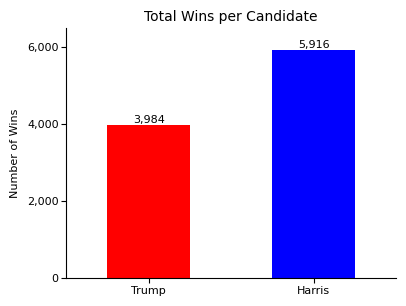

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count how many times each candidate won across all simulations
victory_counts = {'Trump': (results_df['Trump'] >= 270).sum(),
                  'Harris': (results_df['Harris'] >= 270).sum()}

# Count the number of ties (both candidates less than 270)
ties = ((results_df['Trump'] < 270) & (results_df['Harris'] < 270)).sum()

# Print the count of victories for each candidate and the number of ties
print(f"Number of victories for Trump: {victory_counts['Trump']}")
print(f"Number of victories for Harris: {victory_counts['Harris']}")
print(f"Number of ties: {ties}")

# Convert victory counts into a DataFrame for seaborn (excluding ties)
victory_df = pd.DataFrame(list(victory_counts.items()), columns=['Candidate', 'Wins'])

# Create a more compact figure size
plt.figure(figsize=(4, 3))

# Create a bar plot with thinner, closer bars
bar_width = 0.5
x = np.arange(len(victory_df))

bars = plt.bar(x, victory_df['Wins'], width=bar_width, color=['red', 'blue'])

# Customize the x-axis
plt.xticks(x, victory_df['Candidate'], fontsize=8)
plt.xlim(-0.5, len(victory_df) - 0.5)

# Add titles and labels
plt.title("Total Wins per Candidate", fontsize=10, pad=5)
plt.ylabel("Number of Wins", fontsize=8, labelpad=5)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontsize=8)

# Set y-axis limits and ticks
ax = plt.gca()
ax.set_ylim(0, 6500)
y_ticks = [0, 2000, 4000, 6000]
ax.set_yticks(y_ticks)
ax.set_yticklabels([f'{tick:,}' for tick in y_ticks])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick parameters
plt.tick_params(axis='both', which='major', labelsize=8, pad=2)

# Tighten the layout to remove excess whitespace
plt.tight_layout(pad=0.5)

# Show the plot
plt.show()


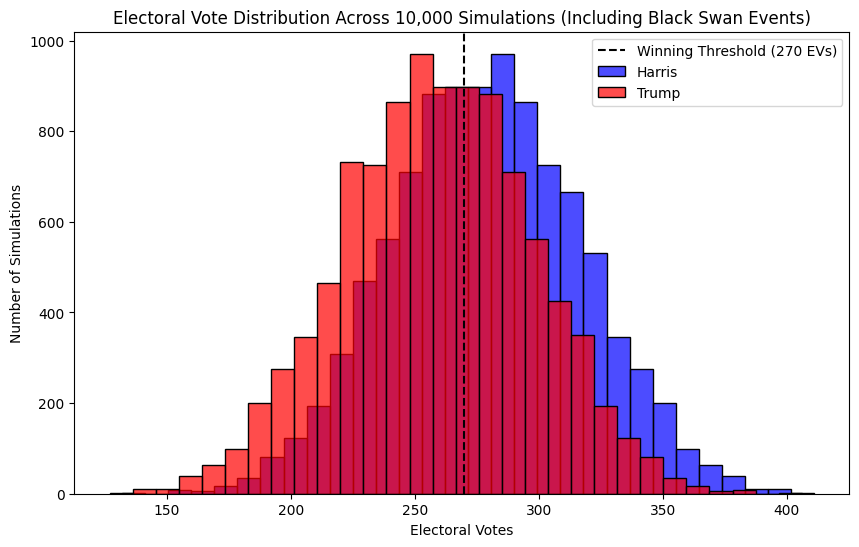

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results_df' is a DataFrame containing electoral vote data for 'Trump' and 'Harris'
import pandas as pd

# Save the data to a CSV file to recreate plot elsewhere
results_df[['Trump', 'Harris']].to_csv('electoral_vote_distribution.csv', index=False)

# Create a histogram of the electoral vote distribution for Trump and Harris
plt.figure(figsize=(10, 6))

# Plot the histogram for Harris' electoral votes
sns.histplot(results_df['Harris'], bins=30, kde=False, color='blue', label='Harris', alpha=0.7)

# Plot the histogram for Trump's electoral votes
sns.histplot(results_df['Trump'], bins=30, kde=False, color='red', label='Trump', alpha=0.7)

# Add a vertical line to indicate the winning threshold of 270 electoral votes
plt.axvline(x=270, color='black', linestyle='--', label='Winning Threshold (270 EVs)')

# Add titles and labels
plt.title("Electoral Vote Distribution Across 10,000 Simulations (Including Black Swan Events)")
plt.xlabel("Electoral Votes")
plt.ylabel("Number of Simulations")
plt.legend()

# Show the plot
plt.show()


Trump Median Electoral Votes: 259.0
Harris Median Electoral Votes: 279.0
Trump Mean Electoral Votes: 259.1043
Harris Mean Electoral Votes: 278.8957


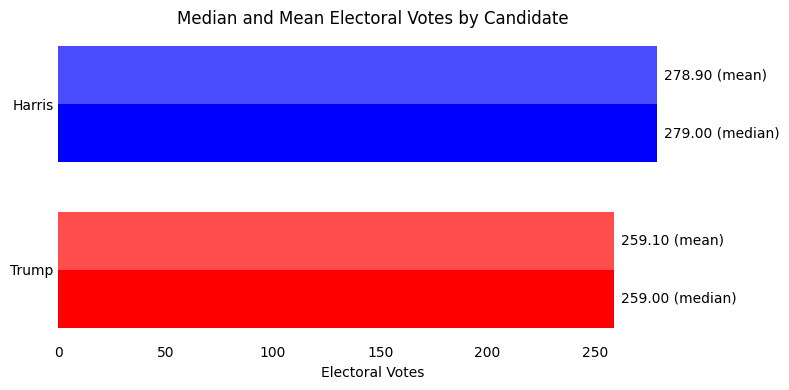

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the median and mean electoral votes for each candidate
trump_median = results_df['Trump'].median()
harris_median = results_df['Harris'].median()

trump_mean = results_df['Trump'].mean()
harris_mean = results_df['Harris'].mean()

# Print the results
print(f"Trump Median Electoral Votes: {trump_median}")
print(f"Harris Median Electoral Votes: {harris_median}")

print(f"Trump Mean Electoral Votes: {trump_mean}")
print(f"Harris Mean Electoral Votes: {harris_mean}")

# Prepare data for the clustered bar plot
labels = ['Trump', 'Harris']
medians = [trump_median, harris_median]
means = [trump_mean, harris_mean]

x = np.arange(len(labels))  # the label locations
height = 0.35  # the height of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Plot median and mean values horizontally
rects1 = ax.barh(x - height/2, medians, height, color=['red', 'blue'])
rects2 = ax.barh(x + height/2, means, height, color=['red', 'blue'], alpha=0.7)

# Add labels, title, and custom y-axis tick labels
ax.set_xlabel('Electoral Votes')
ax.set_title('Median and Mean Electoral Votes by Candidate')
ax.set_yticks(x)
ax.set_yticklabels(labels)

# Remove the legend and add custom text labels
def add_custom_labels(rects, label_type):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f} ({label_type})',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

add_custom_labels(rects1, 'median')
add_custom_labels(rects2, 'mean')

# Remove the box (spines) around the bars
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove tick marks
ax.tick_params(axis='x', which='both', length=0)
ax.tick_params(axis='y', which='both', length=0)

# Tighten the layout to remove excess whitespace
plt.tight_layout()

# Show the plot
plt.show()


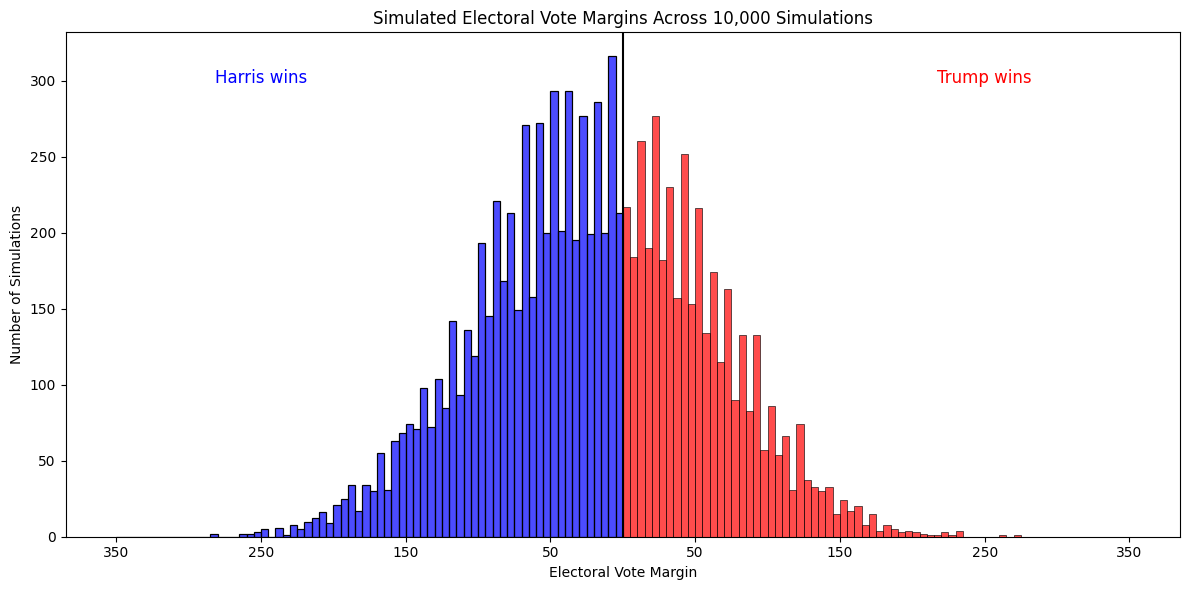

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'results_df' is a DataFrame containing electoral vote data for 'Trump' and 'Harris'

# Calculate the electoral vote margin
results_df['Margin'] = results_df['Trump'] - results_df['Harris']

# Save the data to a CSV file, including the 'Margin' column
results_df[['Trump', 'Harris', 'Margin']].to_csv('electoral_vote_distribution_with_margin.csv', index=False)

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot the histogram for Harris's wins in blue
sns.histplot(results_df[results_df['Margin'] < 0]['Margin'], bins=range(-350, 1, 5), kde=False, color='blue', alpha=0.7, label='Harris wins')

# Plot the histogram for Trump's wins in red
sns.histplot(results_df[results_df['Margin'] > 0]['Margin'], bins=range(0, 351, 5), kde=False, color='red', alpha=0.7, label='Trump wins')

# Add a vertical line at 0 to indicate the threshold of no winner (exact tie)
plt.axvline(x=0, color='black', linestyle='-', label='270 EV')

# Add a label to show where Harris and Trump wins occur
plt.text(-250, max(plt.ylim()) * 0.9, 'Harris wins', color='blue', fontsize=12, ha='center')
plt.text(250, max(plt.ylim()) * 0.9, 'Trump wins', color='red', fontsize=12, ha='center')

# Modify the x-axis labels to display absolute values
plt.xticks(ticks=range(-350, 351, 100), labels=[f"{abs(x)}" for x in range(-350, 351, 100)])

# Add titles and labels
plt.title("Simulated Electoral Vote Margins Across 10,000 Simulations")
plt.xlabel("Electoral Vote Margin")
plt.ylabel("Number of Simulations")
# plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


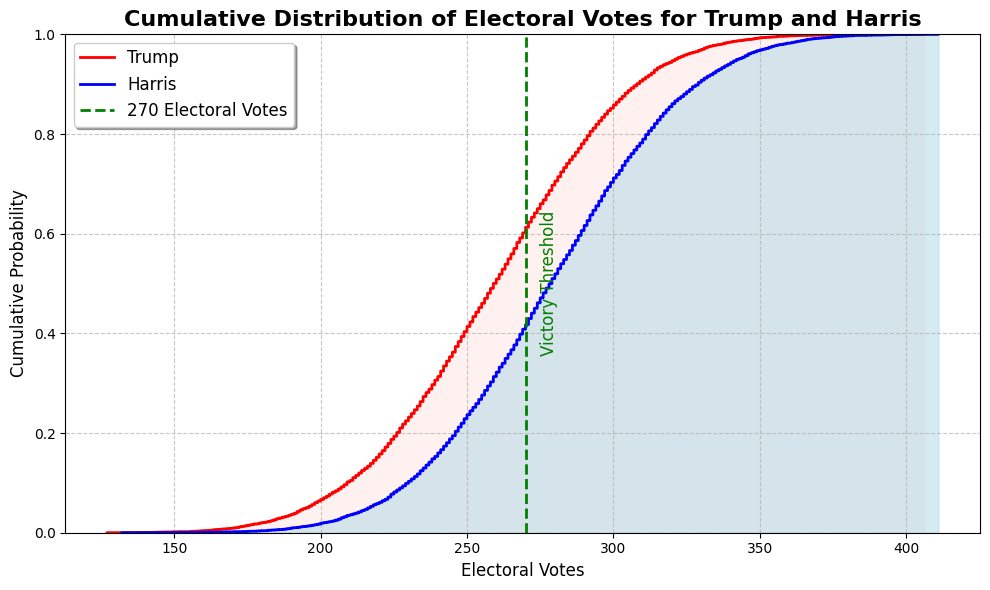

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract Trump and Harris electoral vote totals from the simulation results
trump_votes = results_df['Trump']
harris_votes = results_df['Harris']

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot CDF for Trump with gradient fill
sns.ecdfplot(trump_votes, color='red', label='Trump', linewidth=2)
plt.fill_between(trump_votes.sort_values(), np.linspace(0, 1, len(trump_votes)), color='mistyrose', alpha=0.5)

# Plot CDF for Harris with gradient fill
sns.ecdfplot(harris_votes, color='blue', label='Harris', linewidth=2)
plt.fill_between(harris_votes.sort_values(), np.linspace(0, 1, len(harris_votes)), color='lightblue', alpha=0.5)

# Add a vertical line for the 270 electoral vote threshold
plt.axvline(x=270, color='green', linestyle='--', label='270 Electoral Votes', linewidth=2)

# Add titles and labels
plt.title('Cumulative Distribution of Electoral Votes for Trump and Harris', fontsize=16, fontweight='bold')
plt.xlabel('Electoral Votes', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)

# Customize the plot further with grid, improved legend, and shading for victory threshold
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

# Add text annotation for the victory threshold
plt.text(275, 0.5, 'Victory Threshold', fontsize=12, color='green', verticalalignment='center', rotation=90)

# Show the plot
plt.tight_layout()
plt.show()



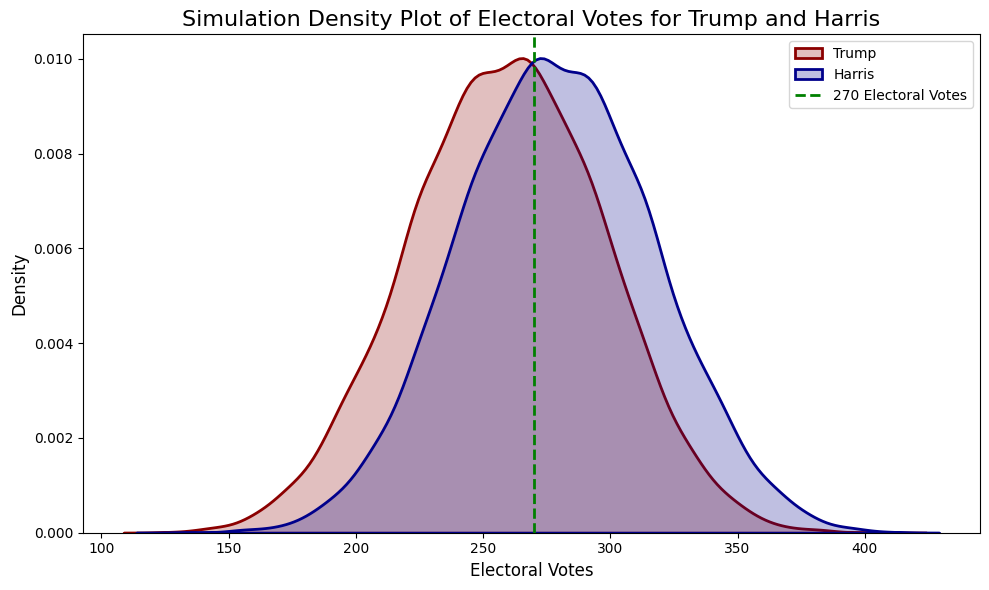

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Extract Trump and Harris electoral vote totals from the simulation results
trump_votes = results_df['Trump']
harris_votes = results_df['Harris']

# Step 2: Set up the figure for the density plot
plt.figure(figsize=(10, 6))

# Step 3: Plot the density for Trump
sns.kdeplot(trump_votes, color='darkred', fill=True, label='Trump', linewidth=2)

# Step 4: Plot the density for Harris
sns.kdeplot(harris_votes, color='darkblue', fill=True, label='Harris', linewidth=2)

# Step 5: Add vertical lines for the 270 electoral vote threshold
plt.axvline(x=270, color='green', linestyle='--', label='270 Electoral Votes', linewidth=2)

# Step 6: Customize the plot
plt.title('Simulation Density Plot of Electoral Votes for Trump and Harris', fontsize=16)
plt.xlabel('Electoral Votes', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Create a dictionary to store the results for each state
state_results = {state: {'Trump Wins': 0, 'Harris Wins': 0, 'Trump Election Win %': 0, 'Harris Election Win %': 0}
                 for state in electoral_votes.keys()}

# Loop through the simulation results and populate the state_results dictionary
for sim in all_results_manual_adjustments:
    trump_total = sim['Trump']
    harris_total = sim['Harris']
    state_outcomes = sim['States']

    for state, winner in state_outcomes.items():
        if winner == 'Trump':
            state_results[state]['Trump Wins'] += 1
            if trump_total >= 270:
                state_results[state]['Trump Election Win %'] += 1
        elif winner == 'Harris':
            state_results[state]['Harris Wins'] += 1
            if harris_total >= 270:
                state_results[state]['Harris Election Win %'] += 1

# Convert the win counts to percentages
for state in state_results:
    state_results[state]['Trump State Win %'] = round((state_results[state]['Trump Wins'] / n_simulations) * 100, 2)
    state_results[state]['Harris State Win %'] = round((state_results[state]['Harris Wins'] / n_simulations) * 100, 2)
    state_results[state]['Trump Election Win %'] = round((state_results[state]['Trump Election Win %'] / state_results[state]['Trump Wins']) * 100, 2) if state_results[state]['Trump Wins'] > 0 else 0
    state_results[state]['Harris Election Win %'] = round((state_results[state]['Harris Election Win %'] / state_results[state]['Harris Wins']) * 100, 2) if state_results[state]['Harris Wins'] > 0 else 0

# Create a DataFrame to display the results in a table
state_results_df = pd.DataFrame(state_results).T.reset_index()
state_results_df = state_results_df.rename(columns={'index': 'State',
                                                    'Trump Wins': 'Trump State Wins',
                                                    'Harris Wins': 'Harris State Wins',
                                                    'Trump Election Win %': 'Trump Election Win % when State Won',
                                                    'Harris Election Win %': 'Harris Election Win % when State Won',
                                                    'Trump State Win %': 'Trump State Win %',
                                                    'Harris State Win %': 'Harris State Win %'})

# Round the DataFrame values to two decimal places
state_results_df = state_results_df.round(2)

# Display the table
from google.colab.data_table import DataTable
DataTable(state_results_df)

# Save the table to a CSV file if needed
state_results_df.to_csv('state_results_table.csv', index=False)

# Display table
state_results_df


,State,Trump State Wins,Harris State Wins,Trump Election Win % when State Won,Harris Election Win % when State Won,Trump State Win %,Harris State Win %
0,Alabama,9683.0,317.0,40.05,65.93,96.83,3.17
1,Alaska,6604.0,3396.0,41.14,61.81,66.04,33.96
2,Arizona,5024.0,4976.0,45.72,65.03,50.24,49.76
3,Arkansas,9690.0,310.0,40.10,68.06,96.90,3.10
4,California,287.0,9713.0,86.06,60.51,2.87,97.13
5,Colorado,4241.0,5759.0,44.75,62.74,42.41,57.59
6,Connecticut,2875.0,7125.0,44.21,61.11,28.75,71.25
7,Delaware,288.0,9712.0,43.40,59.28,2.88,97.12
8,District of Columbia,300.0,9700.0,41.00,59.18,3.00,97.00
9,Florida,5603.0,4397.0,53.51,76.62,56.03,43.97


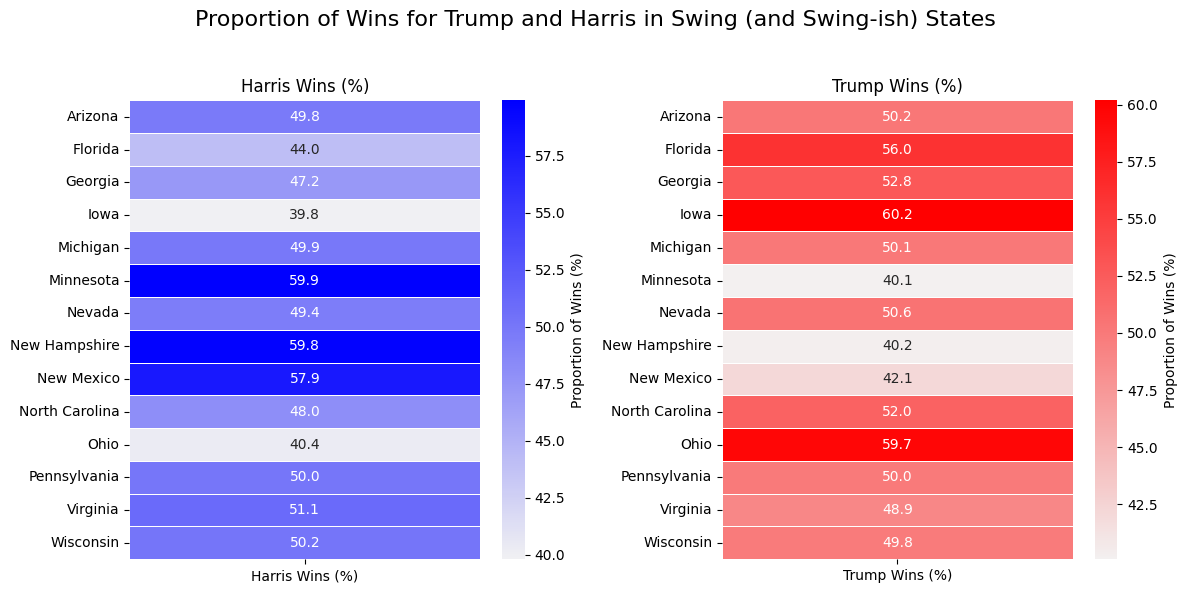

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sorted swing states
swing_states = sorted(['Arizona', 'Georgia', 'Pennsylvania', 'Michigan', 'Wisconsin', 'Nevada',
                       'North Carolina', 'Florida', 'Ohio', 'Iowa', 'Virginia',
                       'New Mexico', 'New Hampshire', 'Minnesota'])

# Ensure that 'States' column is a dictionary (if not already)
if not isinstance(results_df['States'].iloc[0], dict):
    results_df['States'] = results_df['States'].apply(eval)

# Calculate the proportion of wins for Trump and Harris in swing states
def calculate_win_proportion(states_column, candidate, swing_states):
    return pd.Series({state: sum(1 for states in states_column if states.get(state) == candidate) / len(states_column) * 100 for state in swing_states})

trump_win_proportions = calculate_win_proportion(results_df['States'], 'Trump', swing_states)
harris_win_proportions = calculate_win_proportion(results_df['States'], 'Harris', swing_states)

# Create a DataFrame for the heatmap
state_win_proportions = pd.DataFrame({
    'Harris Wins (%)': harris_win_proportions,
    'Trump Wins (%)': trump_win_proportions
})

# Plot the heatmaps separately and combine them
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create custom color maps with lighter colors for stronger performances
trump_cmap = sns.light_palette("red", reverse=False, as_cmap=True)  # Lighter red for higher values
harris_cmap = sns.light_palette("blue", reverse=False, as_cmap=True)  # Lighter blue for higher values

# Plot Harris heatmap
sns.heatmap(state_win_proportions[['Harris Wins (%)']], cmap=harris_cmap, annot=True, fmt=".1f",
            cbar_kws={'label': 'Proportion of Wins (%)'}, linewidths=0.5, ax=ax1)
ax1.set_title('Harris Wins (%)')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)

# Plot Trump heatmap
sns.heatmap(state_win_proportions[['Trump Wins (%)']], cmap=trump_cmap, annot=True, fmt=".1f",
            cbar_kws={'label': 'Proportion of Wins (%)'}, linewidths=0.5, ax=ax2)
ax2.set_title('Trump Wins (%)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# Add a main title to the figure
fig.suptitle("Proportion of Wins for Trump and Harris in Swing (and Swing-ish) States", fontsize=16)

# Adjust layout and display plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

state_win_proportions.to_csv('swing_state_dual_wins.csv', index=True)


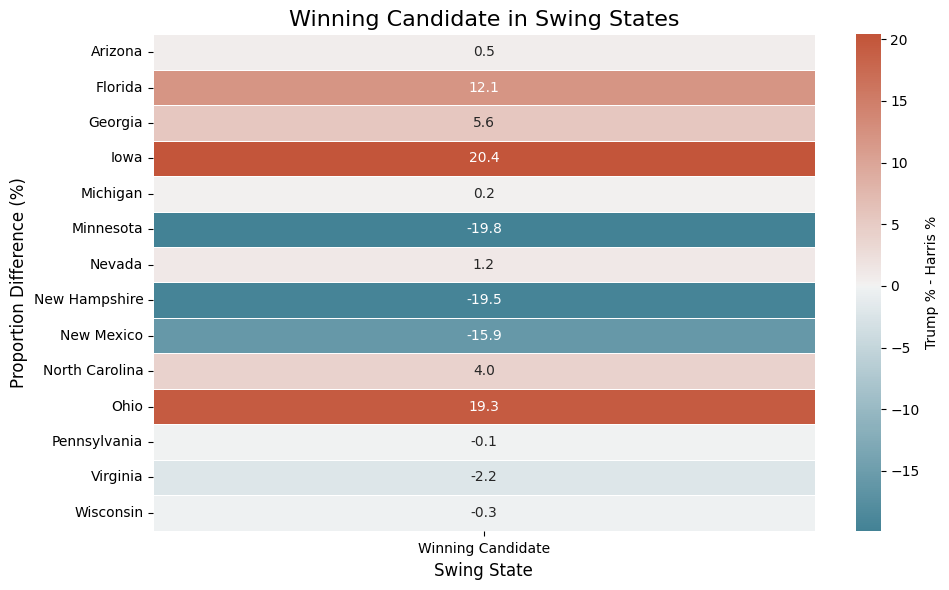

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define swing states
swing_states = sorted(['Arizona', 'Georgia', 'Pennsylvania', 'Michigan', 'Wisconsin', 'Nevada', 'North Carolina', 'Florida',
                       'Ohio', 'Iowa', 'Virginia', 'New Mexico', 'New Hampshire', 'Minnesota'])

# Ensure 'States' column is a dictionary
if not isinstance(results_df['States'].iloc[0], dict):
    results_df['States'] = results_df['States'].apply(eval)

# Calculate win proportions
def calculate_win_proportion(states_column, candidate, swing_states):
    return pd.Series({
        state: sum(1 for states in states_column if states.get(state) == candidate) / len(states_column) * 100
        for state in swing_states
    })

# Get win proportions for Trump and Harris
trump_win_proportions = calculate_win_proportion(results_df['States'], 'Trump', swing_states)
harris_win_proportions = calculate_win_proportion(results_df['States'], 'Harris', swing_states)

# Create a DataFrame for heatmap with a single column for winning candidate
combined_data = pd.DataFrame(index=swing_states)
combined_data['Winning Candidate'] = trump_win_proportions - harris_win_proportions

# Step 5: Plot the heatmap for swing states
plt.figure(figsize=(10, 6))
cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Custom color palette
ax = sns.heatmap(combined_data, cmap=cmap, annot=True, fmt=".1f", center=0,
                 cbar_kws={'label': 'Trump % - Harris %'}, linewidths=0.5)

# Add titles and labels
plt.title("Winning Candidate in Swing States", fontsize=16)
plt.xlabel("Swing State", fontsize=12)
plt.ylabel("Proportion Difference (%)", fontsize=12)

# Make x-axis labels horizontal
plt.xticks(rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), ha="center")
ax.xaxis.set_tick_params(pad=5)

plt.yticks(rotation=0)

# Adjust layout and display plot
plt.tight_layout()
plt.show()

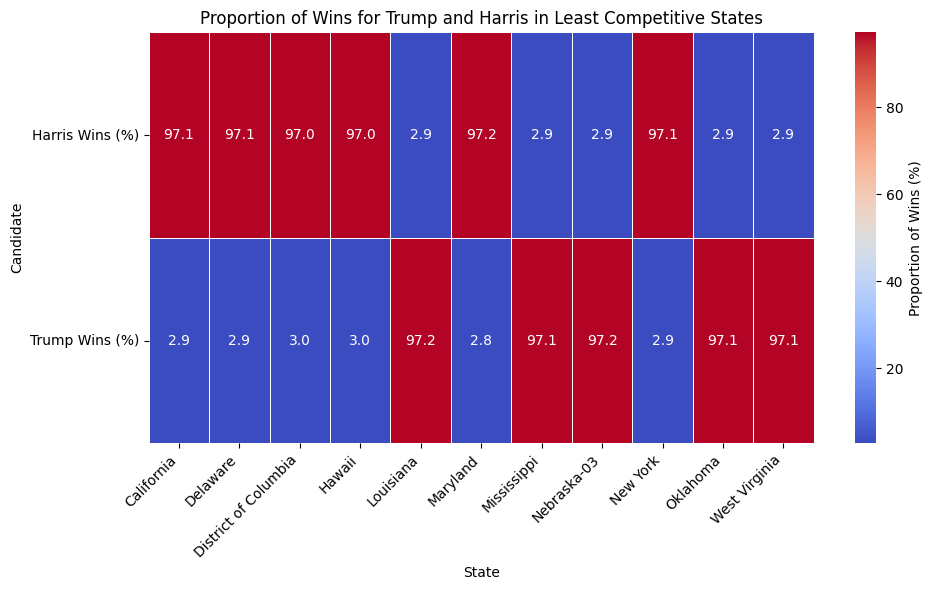

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Calculate the proportion of wins for Trump and Harris by state across all simulations
state_win_proportions = pd.DataFrame({
    'Trump Wins (%)': [results_df['States'].apply(lambda states: states[state] == 'Trump').mean() * 100 for state in electoral_votes],
    'Harris Wins (%)': [results_df['States'].apply(lambda states: states[state] == 'Harris').mean() * 100 for state in electoral_votes]
}, index=electoral_votes.keys())

# Step 2: Calculate the absolute difference between Trump and Harris wins for each state
state_win_proportions['Win Difference (%)'] = (state_win_proportions['Trump Wins (%)'] - state_win_proportions['Harris Wins (%)']).abs()

# Step 3: Sort the states by the absolute win difference and select the 11 least competitive states
least_closest_states = state_win_proportions.sort_values(by='Win Difference (%)', ascending=False).head(11)

# Step 4: Prepare data for heatmap
df_least_closest_melted = least_closest_states.reset_index().melt(id_vars='index', value_vars=['Trump Wins (%)', 'Harris Wins (%)'], var_name='Candidate', value_name='Proportion of Wins (%)')
df_least_closest_melted.rename(columns={'index': 'State'}, inplace=True)

# Save the relevant data to a CSV file
df_least_closest_melted.to_csv('least_competitive_states_win_proportions.csv', index=False)

# Step 5: Create heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    df_least_closest_melted.pivot(index='Candidate', columns='State', values='Proportion of Wins (%)'),
    cmap="coolwarm", annot=True, fmt=".1f", linewidths=.5, center=50, cbar_kws={'label': 'Proportion of Wins (%)'}
)

# Customize the plot
plt.title("Proportion of Wins for Trump and Harris in Least Competitive States")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Display the heatmap
plt.show()


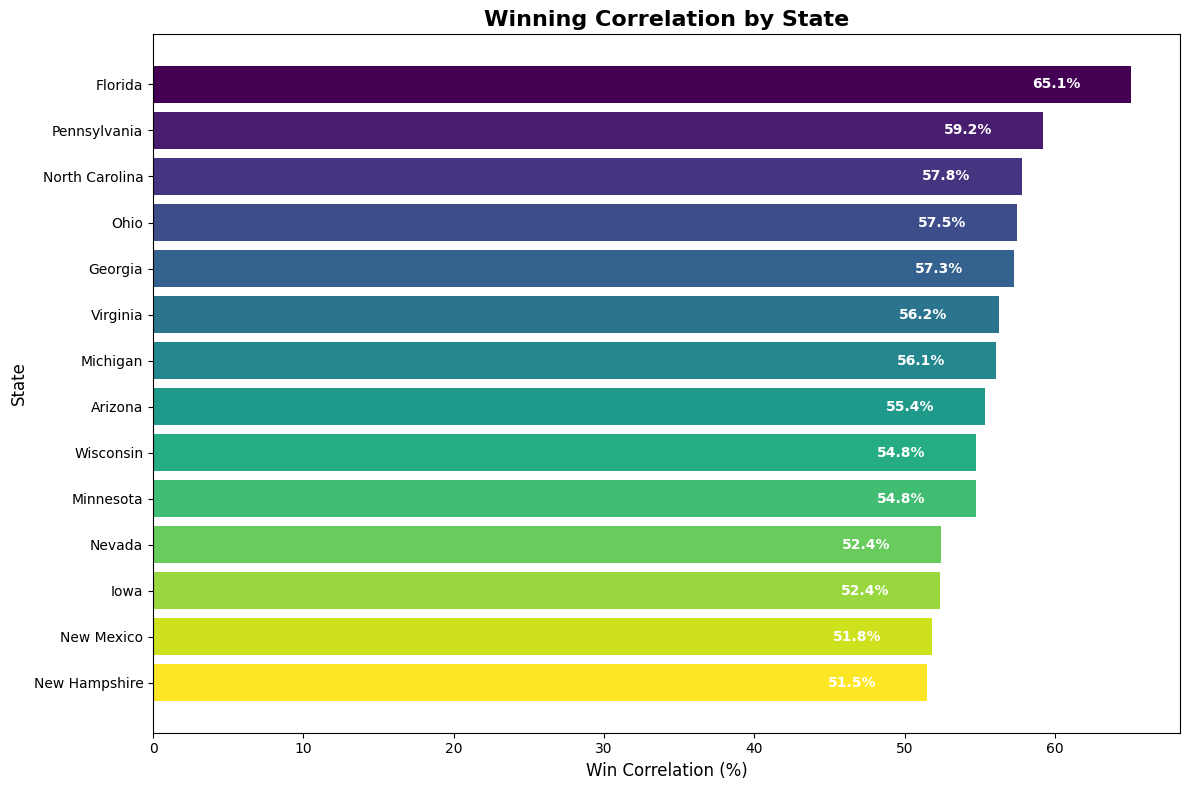

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors

# Define the states of interest (swing states and outliers)
states_of_interest = ['Arizona', 'Georgia', 'Pennsylvania', 'Michigan', 'Wisconsin', 'Nevada',
                       'North Carolina', 'Florida', 'Ohio', 'Iowa', 'Virginia',
                       'New Mexico', 'New Hampshire', 'Minnesota']

# Step 1: Dynamically calculate the state win correlation from the simulation results
state_win_correlation = {}

for state in states_of_interest:
    # Calculate the proportion of times that a candidate wins the election when they win this state
    state_won_by_trump = results_df['States'].apply(lambda states: states[state] == 'Trump')
    state_won_by_harris = results_df['States'].apply(lambda states: states[state] == 'Harris')

    # Calculate the correlation between state wins and overall election wins for both candidates
    trump_win_correlation = (results_df.loc[state_won_by_trump, 'Trump'] > results_df.loc[state_won_by_trump, 'Harris']).mean() * 100
    harris_win_correlation = (results_df.loc[state_won_by_harris, 'Harris'] > results_df.loc[state_won_by_harris, 'Trump']).mean() * 100

    # Calculate the overall correlation by averaging both candidates' win correlation
    overall_correlation = (trump_win_correlation + harris_win_correlation) / 2
    state_win_correlation[state] = overall_correlation

# Step 2: Convert to a DataFrame for visualization
df_state_win = pd.DataFrame(list(state_win_correlation.items()), columns=['State', 'Win Correlation'])

# Sort the DataFrame by Win Correlation for a clearer visual
df_state_win = df_state_win.sort_values(by='Win Correlation', ascending=True)

# Step 3: Plot the segmented bar chart
plt.figure(figsize=(12, 8))

# Reverse the color scheme: highest percentage should have the darkest color
colors = plt.cm.viridis(np.linspace(1, 0, len(df_state_win)))

bars = plt.barh(df_state_win['State'], df_state_win['Win Correlation'], color=colors)

# Add data labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - 5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', ha='center', va='center', color='white', fontweight='bold')

# Add titles and labels
plt.title('Winning Correlation by State', fontsize=16, fontweight='bold')
plt.xlabel('Win Correlation (%)', fontsize=12)
plt.ylabel('State', fontsize=12)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Save as CSV for Tableau
# df_state_win.to_csv('state_win_correlation.csv', index=False)


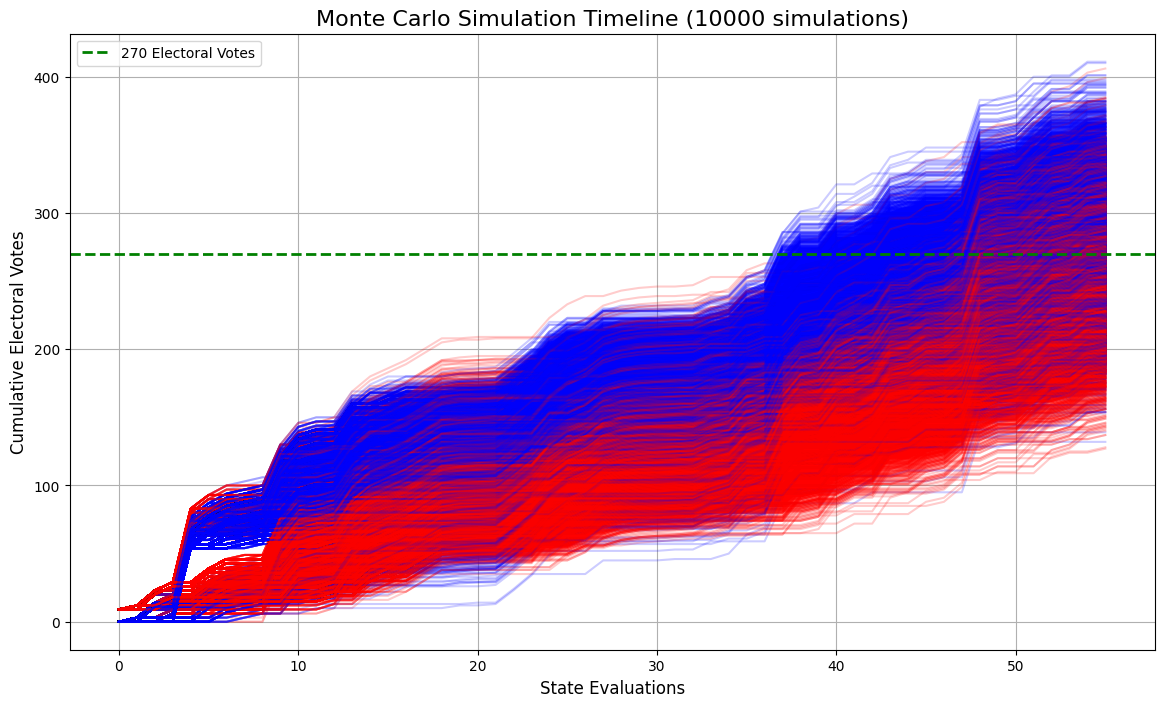

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume `results_df` contains the 10,000 Monte Carlo simulation results
# and the electoral votes by state

def plot_simulation_timeline(results_df, n_simulations=10000, step=1):
    cumulative_data = []  # To store the cumulative electoral votes for each simulation

    plt.figure(figsize=(14, 8))

    # Run through a selection of simulations
    for i in range(0, n_simulations, step):
        simulation = results_df.iloc[i]
        cumulative_trump = 0
        cumulative_harris = 0
        trump_electoral_timeline = []
        harris_electoral_timeline = []

        # Sort states by vote margins for the simulation to simulate the timeline
        for state, winner in simulation['States'].items():
            if winner == 'Trump':
                cumulative_trump += electoral_votes[state]
            else:
                cumulative_harris += electoral_votes[state]
            trump_electoral_timeline.append(cumulative_trump)
            harris_electoral_timeline.append(cumulative_harris)

        # Store the cumulative data for this simulation
        cumulative_data.append({
            'Simulation': i,
            'Trump Cumulative Votes': trump_electoral_timeline[-1],
            'Harris Cumulative Votes': harris_electoral_timeline[-1]
        })

        # Plot the cumulative electoral vote timeline for both candidates
        plt.plot(trump_electoral_timeline, color='red', alpha=0.2)
        plt.plot(harris_electoral_timeline, color='blue', alpha=0.2)

    # Save the cumulative data to a CSV file
    pd.DataFrame(cumulative_data).to_csv('simulation_timeline_cumulative_votes.csv', index=False)

    # Plot a reference line for the 270 electoral vote threshold
    plt.axhline(y=270, color='green', linestyle='--', linewidth=2, label='270 Electoral Votes')

    # Add labels and titles
    plt.title(f'Monte Carlo Simulation Timeline ({n_simulations} simulations)', fontsize=16)
    plt.xlabel('State Evaluations', fontsize=12)
    plt.ylabel('Cumulative Electoral Votes', fontsize=12)
    plt.legend()
    plt.grid(True)

    plt.show()

# Run the timeline plot function
plot_simulation_timeline(results_df)


In [ ]:
import pandas as pd

# Step 1: Calculate the proportion of wins for Trump and Harris by state across all simulations
state_win_proportions = pd.DataFrame({
    'Trump Wins (%)': [results_df['States'].apply(lambda states: states[state] == 'Trump').mean() * 100 for state in electoral_votes],
    'Harris Wins (%)': [results_df['States'].apply(lambda states: states[state] == 'Harris').mean() * 100 for state in electoral_votes]
}, index=electoral_votes.keys())

# Step 2: Create a combined win percentage column
state_win_proportions['Dominant Party'] = state_win_proportions.apply(lambda row: 'Trump' if row['Trump Wins (%)'] > row['Harris Wins (%)'] else 'Harris', axis=1)
state_win_proportions['Dominant Win %'] = state_win_proportions[['Trump Wins (%)', 'Harris Wins (%)']].max(axis=1)

# Step 3: Add a state abbreviation column for easier mapping
state_win_proportions['State'] = state_win_proportions.index

# Step 4: Export the state win proportions to a CSV file for use in Tableau
state_win_proportions.to_csv('state_win_proportions_for_map.csv', index=False)

print("CSV file 'state_win_proportions_for_map.csv' has been generated successfully.")


CSV file 'state_win_proportions_for_map.csv' has been generated successfully.


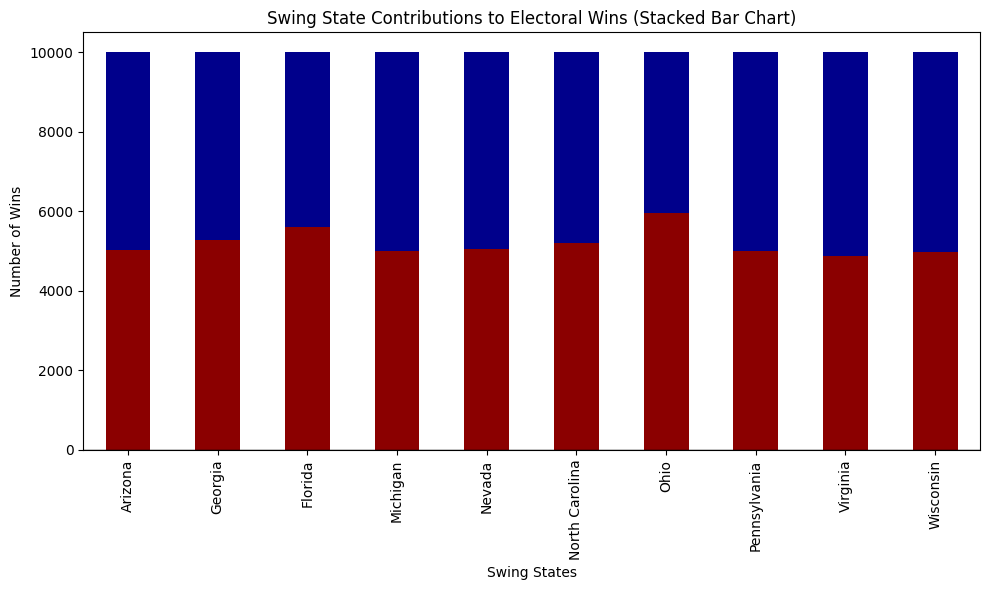

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Step 1: Identify key swing states
# Swing states are identified as those that contributed to both candidates in different simulations
swing_states = ['Arizona', 'Georgia', 'Florida', 'Michigan', 'Nevada', 'North Carolina', 'Ohio',
                'Pennsylvania', 'Virginia', 'Wisconsin']

# Step 2: Count wins by state for each candidate
def count_swing_state_wins(results_df, swing_states):
    trump_swing_state_wins = Counter()
    harris_swing_state_wins = Counter()

    for states in results_df['States']:
        for state, winner in states.items():
            if state in swing_states:
                if winner == 'Trump':
                    trump_swing_state_wins[state] += 1
                elif winner == 'Harris':
                    harris_swing_state_wins[state] += 1

    return trump_swing_state_wins, harris_swing_state_wins

# Get swing state win counts for both candidates
trump_swing_state_wins, harris_swing_state_wins = count_swing_state_wins(results_df, swing_states)

# Step 3: Convert to a DataFrame
swing_states_df = pd.DataFrame({
    'State': swing_states,
    'Trump Wins': [trump_swing_state_wins[state] for state in swing_states],
    'Harris Wins': [harris_swing_state_wins[state] for state in swing_states]
})

# Step 4: Plot a stacked bar chart
swing_states_df.set_index('State', inplace=True)
ax = swing_states_df.plot(kind='bar', stacked=True, color=['darkred', 'darkblue'], figsize=(10, 6))

# Step 5: Customize the plot
plt.title('Swing State Contributions to Electoral Wins (Stacked Bar Chart)')
plt.ylabel('Number of Wins')
plt.xlabel('Swing States')
plt.axhline(y=0, color='black', linewidth=1)
plt.tight_layout()

# Remove the legend
ax.get_legend().remove()

# Step 6: Show the plot
plt.show()


# Optional: Save the swing state data to a CSV for further use in Tableau
swing_states_df.reset_index().to_csv('swing_state_contributions.csv', index=False)


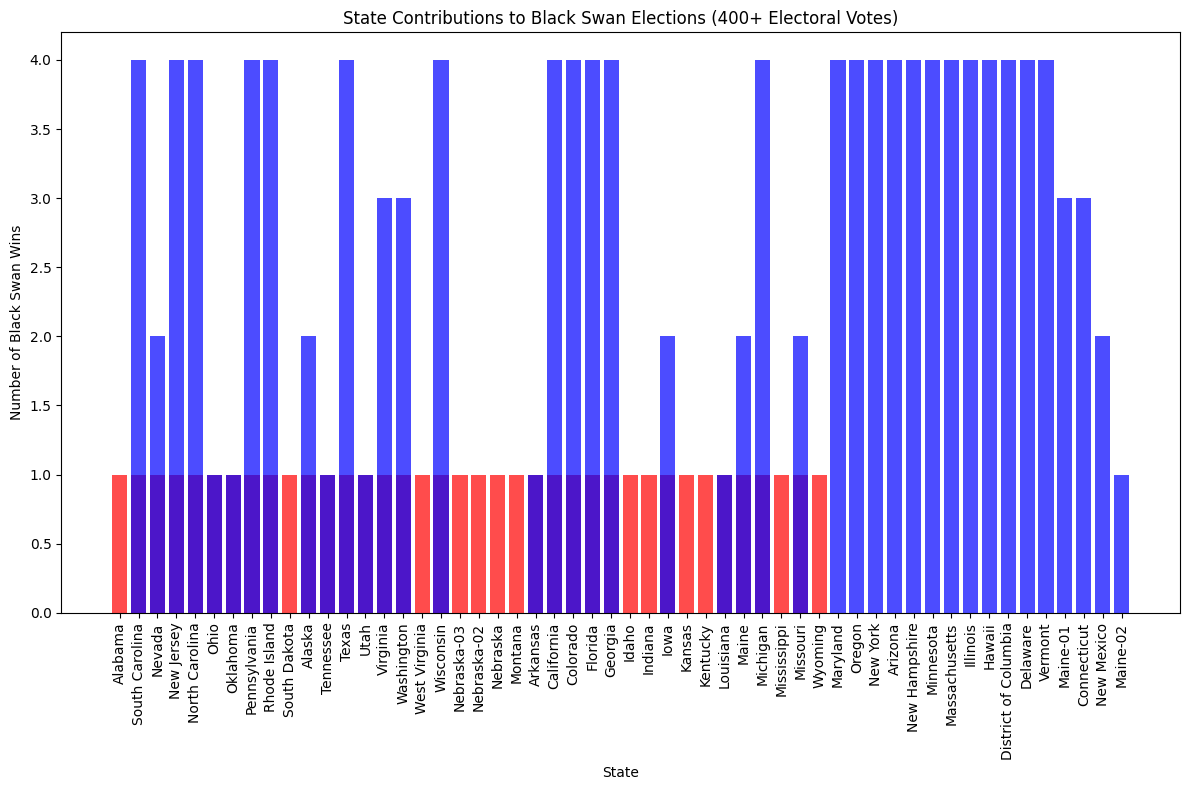

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the threshold for black swan events (400 or more electoral votes)
black_swan_threshold = 400

# Filter out black swan events for both Trump and Harris
black_swan_trump = results_df[results_df['Trump'] >= black_swan_threshold]
black_swan_harris = results_df[results_df['Harris'] >= black_swan_threshold]

# Initialize dictionaries to track state contributions
trump_state_contributions = {}
harris_state_contributions = {}

# Count how often each state contributed to black swan events for each candidate
for idx, row in black_swan_trump.iterrows():
    for state, winner in row['States'].items():
        if winner == 'Trump':
            if state in trump_state_contributions:
                trump_state_contributions[state] += 1
            else:
                trump_state_contributions[state] = 1

for idx, row in black_swan_harris.iterrows():
    for state, winner in row['States'].items():
        if winner == 'Harris':
            if state in harris_state_contributions:
                harris_state_contributions[state] += 1
            else:
                harris_state_contributions[state] = 1

# Convert the dictionaries into DataFrames for visualization
trump_contributions_df = pd.DataFrame(list(trump_state_contributions.items()), columns=['State', 'Trump Wins']).sort_values(by='Trump Wins', ascending=False)
harris_contributions_df = pd.DataFrame(list(harris_state_contributions.items()), columns=['State', 'Harris Wins']).sort_values(by='Harris Wins', ascending=False)

# Plot the state contributions to black swan events
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Trump wins and Harris wins as stacked bars
trump_bars = ax.bar(trump_contributions_df['State'], trump_contributions_df['Trump Wins'], label='Trump', color='red', alpha=0.7)
harris_bars = ax.bar(harris_contributions_df['State'], harris_contributions_df['Harris Wins'], label='Harris', color='blue', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('State')
ax.set_ylabel('Number of Black Swan Wins')
ax.set_title('State Contributions to Black Swan Elections (400+ Electoral Votes)')
#ax.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# Combine the data into a single DataFrame
contributions_df = pd.merge(trump_contributions_df, harris_contributions_df, on='State', how='outer').fillna(0)

# Save the DataFrame to a CSV file
contributions_df.to_csv('state_contributions_black_swan_events.csv', index=False)
